In [1]:
!pip install mpl_finance
!pip install --upgrade mplfinance

In [2]:
# First import the libraries that we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
from datetime import datetime

In [3]:
bc = pd.read_csv('C:/Users/falda/Downloads/BTC-USD.csv', parse_dates=True)
bc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2566,2021-09-26,42721.628906,43919.300781,40848.460938,43208.539063,43208.539063,3.066122e+10
2567,2021-09-27,43234.183594,44313.246094,42190.632813,42235.730469,42235.730469,3.098003e+10
2568,2021-09-28,42200.898438,42775.144531,40931.664063,41034.542969,41034.542969,3.021494e+10
2569,2021-09-29,41064.984375,42545.257813,40829.667969,41564.363281,41564.363281,3.060236e+10


In [4]:
bc.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

In [5]:
print(bc[bc.isna().any(axis=1)])

            Date  Open  High  Low  Close  Adj Close  Volume
2039  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
2214  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
2217  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
2218  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN
2570  2021-09-30   NaN   NaN  NaN    NaN        NaN     NaN


In [6]:
bc = bc.dropna()
print(bc)

            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2565  2021-09-25  42840.890625  42996.257813  41759.921875  42716.593750   
2566  2021-09-26  42721.628906  43919.300781  40848.460938  43208.539063   
2567  2021-09-27  43234.183594  44313.246094  42190.632813  42235.730469   
2568  2021-09-28  42200.898438  42775.144531  40931.664063  41034.542969   
2569  2021-09-29  41064.984375  42545.257813  40829.667969  41564.363281   

         Adj Close        Volume  
0       457.334015  2.105680e+07  
1       424.44000

In [7]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2566 entries, 0 to 2569
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2566 non-null   object 
 1   Open       2566 non-null   float64
 2   High       2566 non-null   float64
 3   Low        2566 non-null   float64
 4   Close      2566 non-null   float64
 5   Adj Close  2566 non-null   float64
 6   Volume     2566 non-null   float64
dtypes: float64(6), object(1)
memory usage: 160.4+ KB


In [8]:
bc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2566.000000,2566.000000,2566.000000,2566.000000,2566.000000,2.566000e+03
mean,9114.470519,9371.510723,8831.812751,9129.679735,9129.679735,1.357158e+10
std,13358.623111,13757.050824,12895.699652,13371.878671,13371.878671,1.985410e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,575.625488,580.690735,571.070740,575.560241,575.560241,7.318948e+07
50%,5308.327637,5422.169434,5221.697753,5319.541504,5319.541504,4.474525e+09
75%,9631.760254,9797.936523,9426.634521,9644.885009,9644.885009,2.157599e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [9]:
#Creates a new column called 'Return' that is the percentage change from the previous column 
#on the adjusted closing price
bc['Return'] = bc['Adj Close'].pct_change()
bc.head()

<ipython-input-9-19810e2be86c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Return'] = bc['Adj Close'].pct_change()


,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-0.071926
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-0.069843
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,0.035735
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-0.024659


Text(0.5, 1.0, 'Opening Price vs. Date')

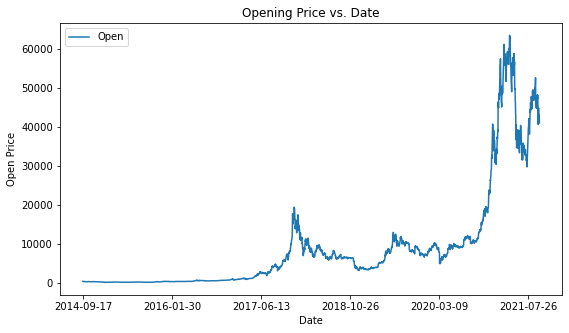

In [10]:
bc.plot('Date', 'Open', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Opening Price vs. Date')

Text(0.5, 1.0, 'Closing Price vs. Date')

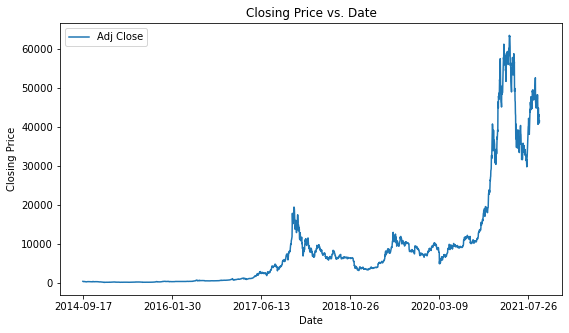

In [11]:
bc.plot('Date', 'Adj Close', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs. Date')

<ipython-input-12-2d3d1c1e9093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Return'] = bc['Close'].pct_change()*100


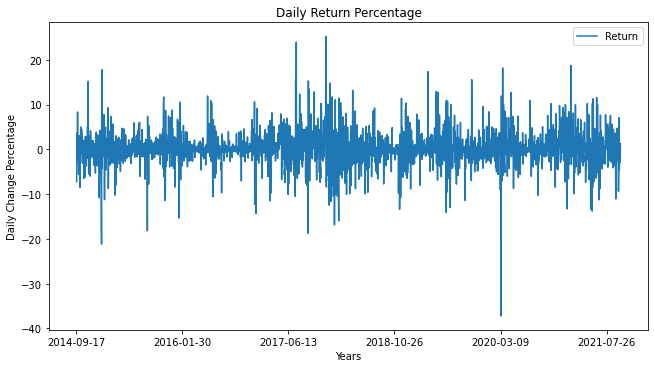

In [12]:
bc['Return'] = bc['Close'].pct_change()*100
bc.head()
bc.plot('Date', 'Return', figsize=(9,5))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Daily Change Percentage')
plt.title("Daily Return Percentage")
plt.show()

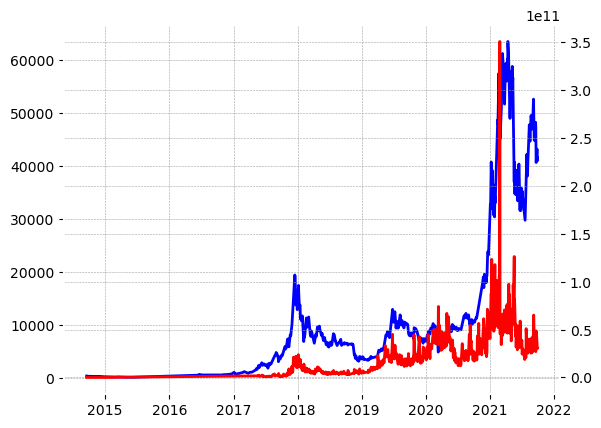

In [29]:
fig, ax = plt.subplots()

ax.plot(bc['Date'], bc['Adj Close'], color = 'blue')

ax2 = ax.twinx()

ax2.plot(bc['Date'], bc['Volume'], color = 'red')

plt.show()

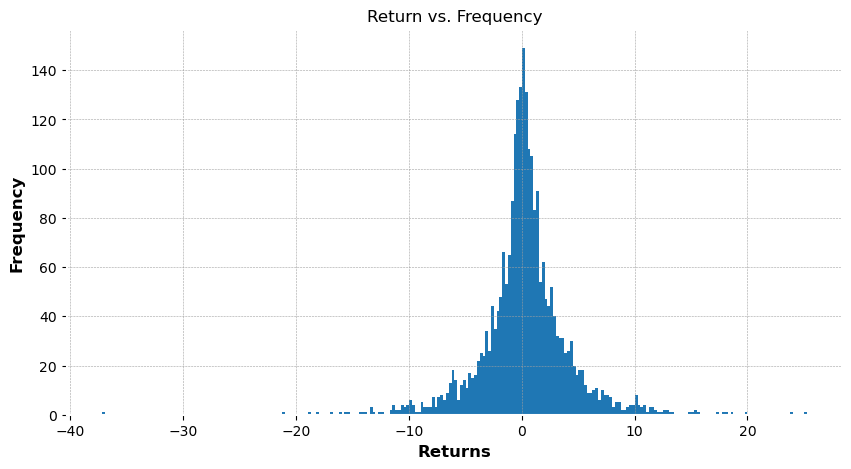

In [31]:
bc.hist('Return', bins = 250, figsize = (10,5))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Return vs. Frequency')
plt.show()

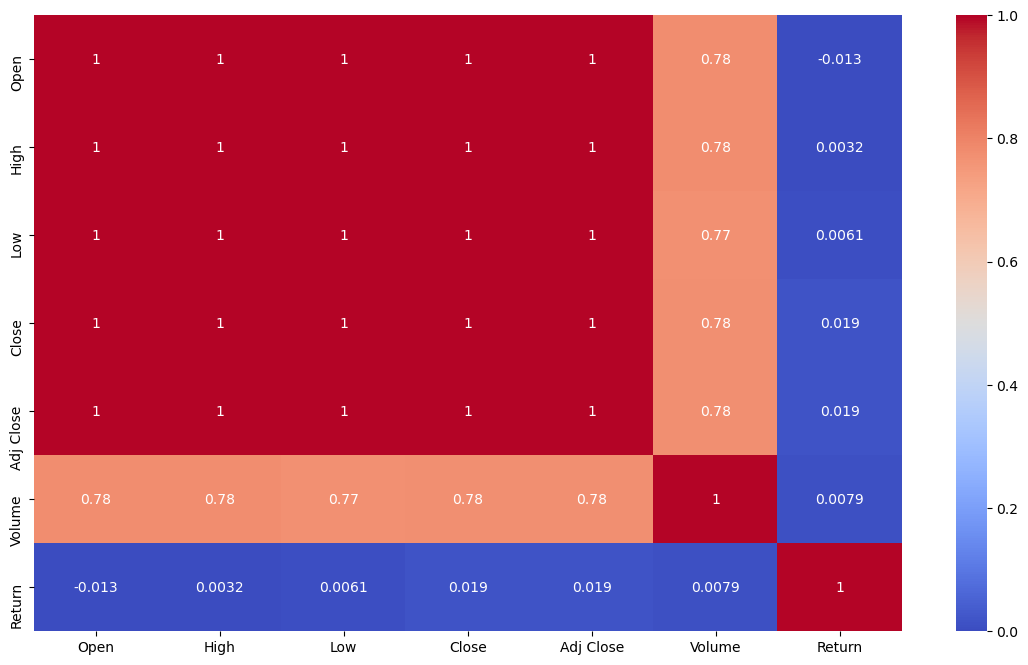

In [33]:
plt.figure(figsize=(14,8))
sns.heatmap(bc.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Return'}>, <AxesSubplot:>]],
      dtype=object)

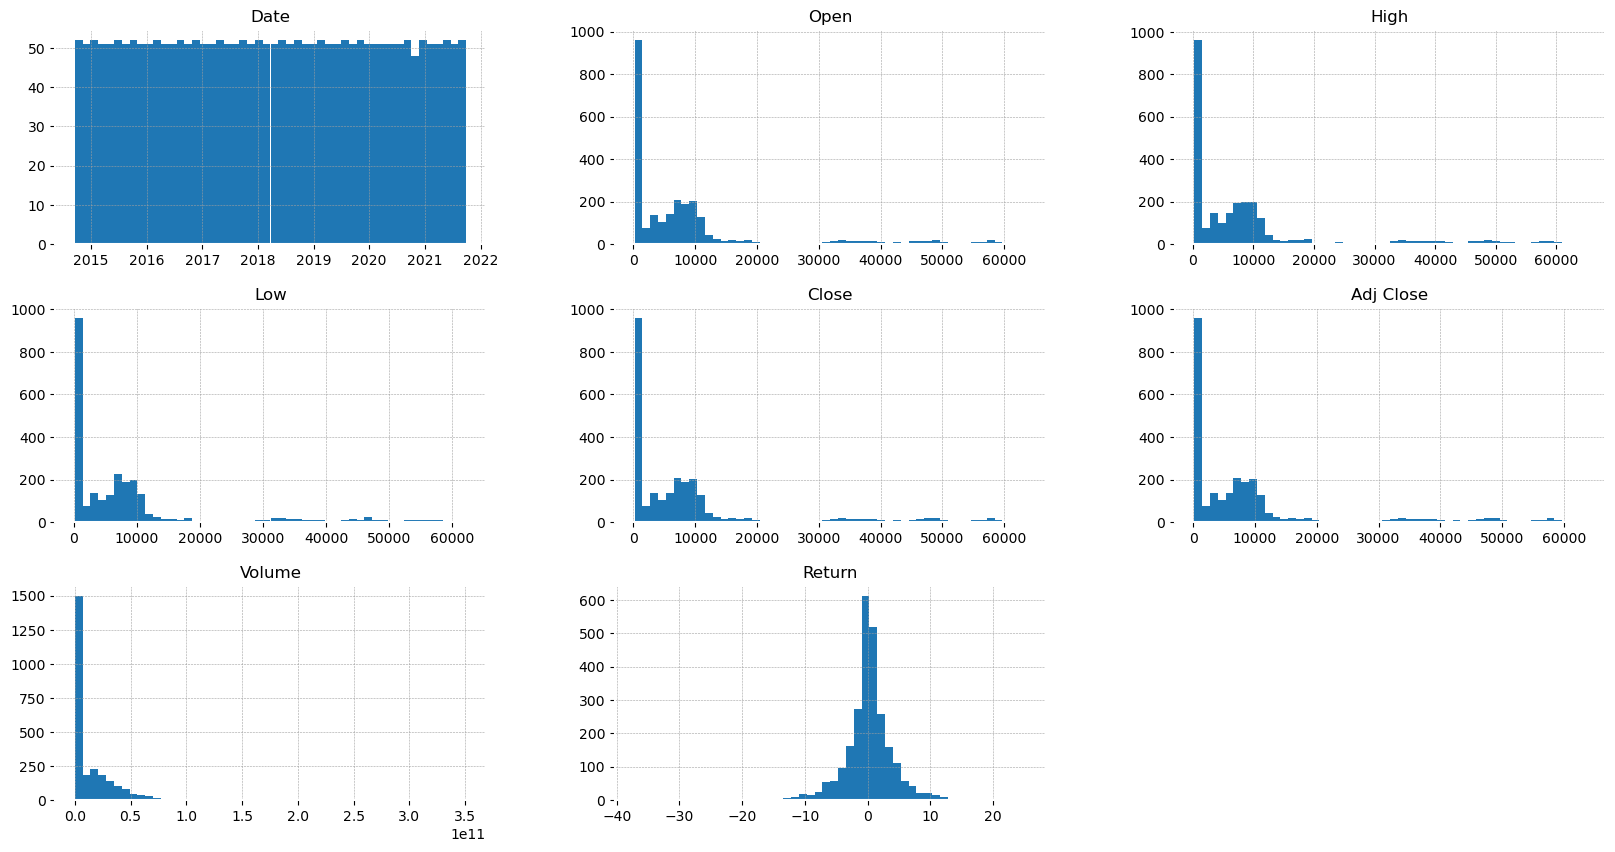

In [34]:
bc.hist(bins = 50, figsize = (20,10))

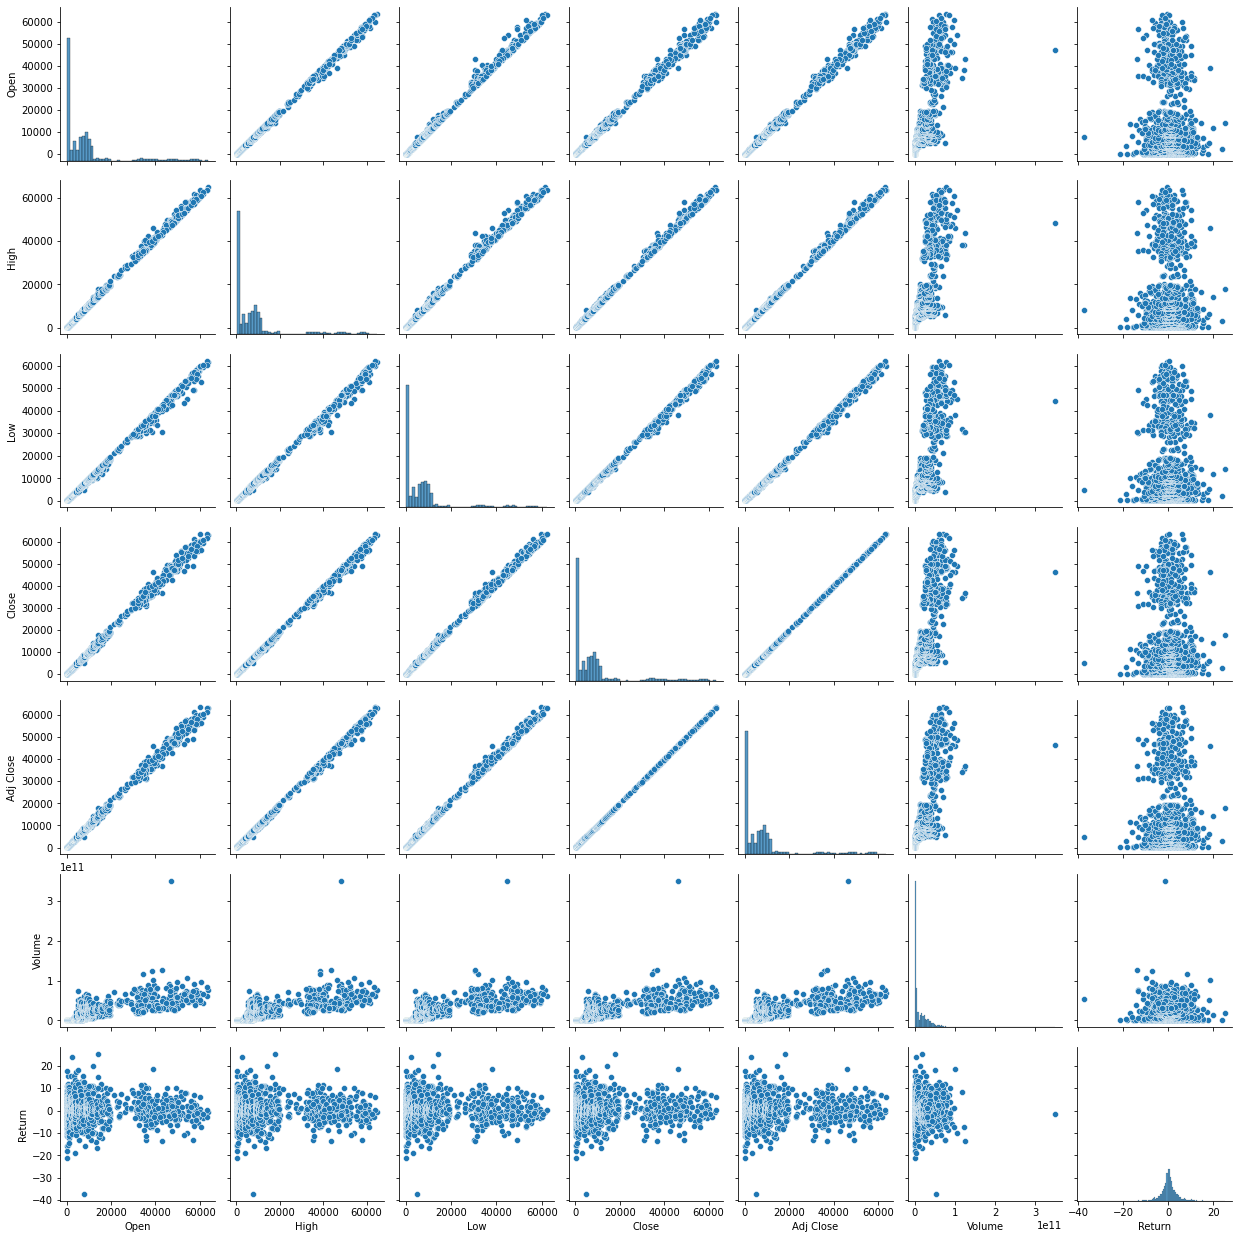

In [18]:
sns.pairplot(bc)

<AxesSubplot:ylabel='Density'>

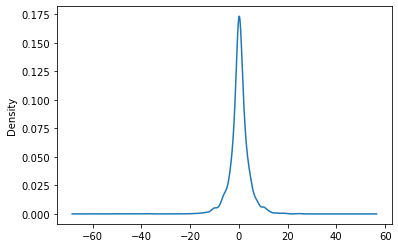

In [22]:
bc['Return'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

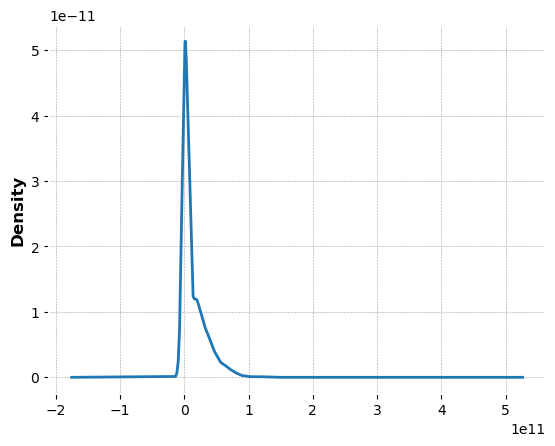

In [43]:
bc['Volume'].plot(kind = 'kde')

C:\Users\falda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\falda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

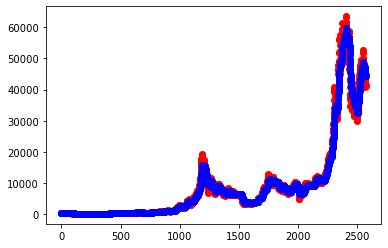

In [23]:
#exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(bc['Adj Close']).fit(smoothing_level = 0.1, optimized = False)

bc['Adj Close'].plot(marker = 'o', color = 'red')
model.fittedvalues.plot(marker = 'o', color ='blue')

In [24]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

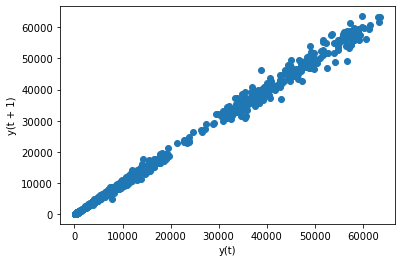

In [25]:
lag_plot(bc['Adj Close'])

<ipython-input-44-66c2f9fbb8e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Date'] = pd.to_datetime(bc['Date'])
<ipython-input-44-66c2f9fbb8e4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

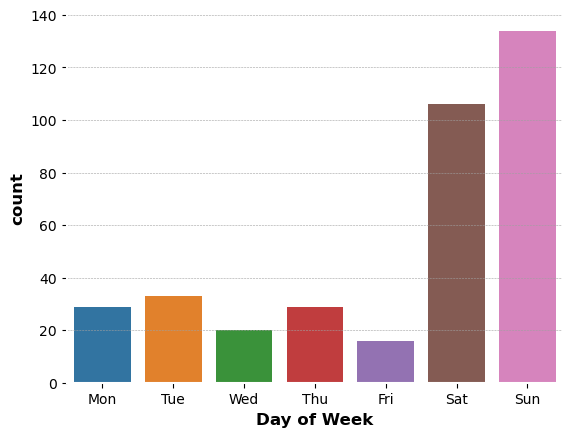

In [44]:
bc['Date'] = pd.to_datetime(bc['Date'])

week={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)

# count min value for each week day
idx = bc.groupby([pd.Grouper(key='Date', freq='W-MON')])['Volume'].transform(min) == bc['Volume']

# data is still in minutes, so I calculate it for days.
lows_count = bc[idx].groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
lows_count = lows_count.dropna()


sns.countplot(x='Day of Week',data=lows_count, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

In [26]:
import mplfinance as mpf

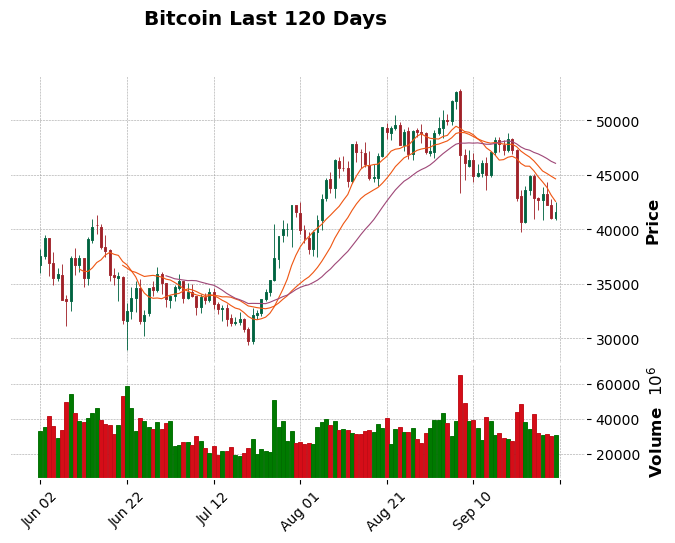

In [28]:
#Limit data so that it becomes easier to see
mpf.plot(bc.set_index('Date').tail(120), 
        type='candle', style='charles', 
        volume=True, 
        title='Bitcoin Last 120 Days', 
        mav=(10,20,30)) #moving average